<span style="font-size:16pt; font-weight:bold;">Linear Regression</span>

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<span style="font-size:12pt; font-weight:bold;">Linear Regression numpy</span>

In [2]:
import numpy as np
np.random.seed(0)
X=np.array([[0.0],[1.0],[2.0],[3.0]])
y = np.array([0.0,1.0,2.1,2.9])
noise = np.random.normal(loc=0.0, scale=0.1, size=y.shape)
y_noisy = y + noise
model = LinearRegression().fit(X,y)
model_noisy = LinearRegression().fit(X,y_noisy)
model.coef_.ravel().tolist(), round(model.intercept_,3)

([0.9799999999999998], np.float64(0.03))

In [3]:
noise

array([0.17640523, 0.04001572, 0.0978738 , 0.22408932])

In [4]:
pred = model.predict(X)
pred_noisy = model_noisy.predict(X)
list(zip(np.round(X.ravel(),1),np.round(y,2), np.round(pred,2)))

[(np.float64(0.0), np.float64(0.0), np.float64(0.03)),
 (np.float64(1.0), np.float64(1.0), np.float64(1.01)),
 (np.float64(2.0), np.float64(2.1), np.float64(1.99)),
 (np.float64(3.0), np.float64(2.9), np.float64(2.97))]

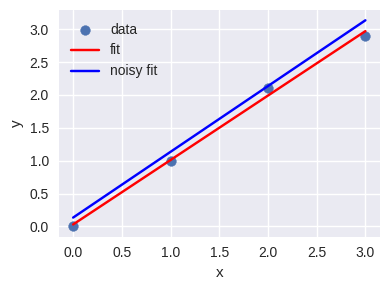

In [5]:
import matplotlib.pyplot as plt; plt.style.use('seaborn-v0_8')
xx=np.linspace(0, 3, 50).reshape(-1,1)
plt.figure(figsize=(4,3))
plt.scatter(X, y, label='data')
plt.plot(xx, model.predict(xx), 'r-', label='fit')
plt.plot(xx, model_noisy.predict(xx), 'b-', label='noisy fit')
plt.plot();
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

<span style="font-size:12pt; font-weight:bold;">Linear Regression sklearn</span>

In [6]:
X, y = make_regression(# synthetic data
    n_samples = 500, n_features = 5, noise = 10.0, random_state = 0
)

In [7]:
Xtr, Xte, ytr, yte = train_test_split( # hold-out split
    X, y, test_size=0.25, random_state = 42
)

In [8]:
est = LinearRegression().fit(Xtr, ytr) # fit baseline
print(r2_score(yte, est.predict(Xte))) # R^2 on hold-out

0.9919107215682054


<span style="font-size:16pt; font-weight:bold;">K-fold CV</span>

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [10]:
X, y = make_classification(
    n_samples = 600, n_features = 10, n_informative = 5,
    class_sep = 1.2, random_state = 0
) # balanced classification

In [11]:
clf = LogisticRegression(max_iter=200) # linear classifier
scores = cross_val_score(clf, X, y, cv=5) # 5 fold CV
print(f"mean = {scores.mean()}, std = {scores.std()}") # mean and std

mean = 0.925, std = 0.017480147469502518


<span style="font-size:16pt; font-weight:bold;">Pipeline</span>

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [13]:
pipe=Pipeline([
    ("scale", StandardScaler()), # feature scaling
("clf", LogisticRegression(max_iter = 200)) # estimator
])

In [14]:
pipe.fit(X, y) # train scaler + model
print(pipe.score(X, y)) # default score (acc.)

0.9233333333333333


<span style="font-size:16pt; font-weight:bold;">Features vs Generalisation</span>

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
X, y = make_classification( # many irrelevant dims
    n_samples=1500, n_features=50, n_informative=5,
    class_sep=1.0, random_state=0
)

In [17]:
Xtr, Xte, ytr, yte = train_test_split( # large test share
    X, y, test_size=0.4, random_state = 42
)

In [18]:
clf = LogisticRegression(max_iter=1000).fit(Xtr, ytr) # linear baseline
print('train acc:', accuracy_score(ytr,clf.predict(Xtr))) # optimistic train
print('test acc:', accuracy_score(yte,clf.predict(Xte))) # degrtaded test

train acc: 0.8377777777777777
test acc: 0.7933333333333333


<span style="font-size:16pt; font-weight:bold;">Visualising features - Iris</span>

In [19]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

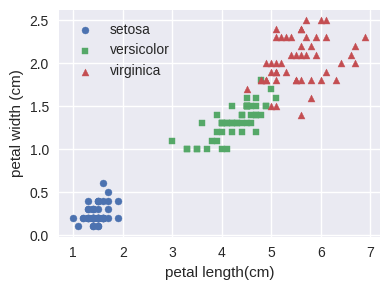

In [20]:
iris = datasets.load_iris()
X=iris.data[:,[2,3]] # petal length, petal width
y = iris.target
plt.figure(figsize=(4,3))
for cls, marker, label in [(0, 'o', iris.target_names[0]),
                           (1, 's', iris.target_names[1]),
                           (2, '^', iris.target_names[2])]:
    idx = y ==cls # give me a boolean array telling me which samles belong to class cls
    plt.scatter(X[idx, 0], X[idx, 1], marker=marker, label=label, s=25)
plt.xlabel('petal length(cm)');plt.ylabel('petal width (cm)');
plt.legend(frameon = False);plt.tight_layout();plt.show()
                           

<span style="font-size:16pt; font-weight:bold;">Iris classification: Pipeline</span>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [23]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [24]:
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.921


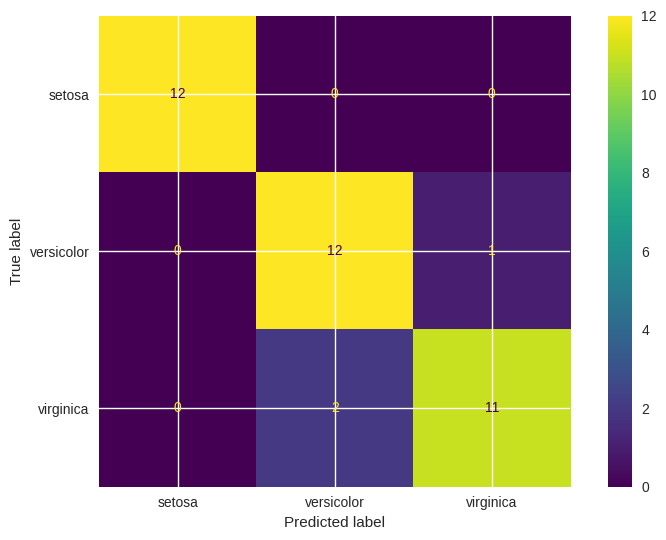

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)
plt.tight_layout();plt.show()

<span style="font-size:16pt; font-weight:bold;">Iris classification: Decision Boundaries</span>

In [26]:
# fit on all data for a prettier boudary plot since we are just visualising
pipe=make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X,y)

xmin, xmax =X[:,0].min()-0.5, X[:,0].max()+0.5
ymin, ymax =X[:1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin,ymax,200))
grid=np.c_[xx.ravel(), yy.ravel()]
zz= pipe.predict(grid).reshape(xx.shape)

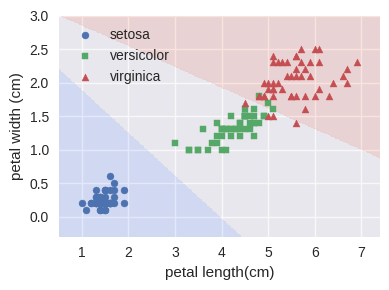

In [27]:
plt.figure(figsize=(4,3))
plt.contourf(xx, yy, zz, alpha=0.2, levels=[-0.5,0.5,1.5,2.5], cmap='coolwarm')
for cls, marker, label in [(0, 'o', iris.target_names[0]),
                           (1, 's', iris.target_names[1]),
                           (2, '^', iris.target_names[2])]:
    idx = y ==cls # give me a boolean array telling me which samles belong to class cls
    plt.scatter(X[idx, 0], X[idx, 1], marker=marker, label=label, s=25)
plt.xlabel('petal length(cm)');plt.ylabel('petal width (cm)');
plt.legend(frameon = False);plt.tight_layout();plt.show()

<span style="font-size:12pt; font-weight:bold;">after splitting do np.bincount(y_train) and np.bincount(y_test) roughly match the class ratios</span>

In [28]:
np.bincount(y_train) 

array([38, 37, 37])

In [29]:
np.bincount(y_test)

array([12, 13, 13])

<span style="font-size:16pt; font-weight:bold;">if you swap features does accuracy change as expected</span>

In [30]:
# original
pipe.fit(X_train, y_train)
acc1=pipe.score(X_test, y_test)

# swapped
X_swapped=X[:,::-1]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_swapped, y, test_size=0.25, random_state=42, stratify=y
)
pipe2=make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe2.fit(X_train_s, y_train_s)
acc2=pipe2.score(X_test_s, y_test_s)

print(acc1,acc2)

0.9210526315789473 0.9210526315789473


if acc1=acc2 the model effectively uses both, ie both features are informative

<span style="font-size:16pt; font-weight:bold;">Basic models in Scikit-Learn</span>

<span style="font-size:12pt; font-weight:bold;">create a tiny playground dataset- nois line for regression, two moons for classification</span>

In [31]:
import numpy as np
rng=np.random.default_rng(0)
Xr=np.linspace(0,5,30).reshape(-1,1)
yr=1.2 * Xr.ravel() + 0.5 + rng.normal(0, 0.35, size=Xr.shape[0])
Xr[:3].ravel(), yr[:3]

(array([0.        , 0.17241379, 0.34482759]),
 array([0.54400558, 0.66065985, 1.13794103]))

In [32]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=300, noise=0.25, random_state=0)
Xm[:2],ym[:6]

(array([[ 0.94073979, -0.71007548],
        [ 0.01729575, -0.32765467]]),
 array([1, 1, 0, 1, 1, 0]))

<span style="font-size:12pt; font-weight:bold;">Linear Regression - Scikit Learn</span>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linreg = LinearRegression().fit(Xr, yr)
y_pred = linreg.predict(Xr)
mae=mean_absolute_error(yr, y_pred)
mse=mean_squared_error(yr, y_pred)
r2 = r2_score(yr,y_pred)
linreg.coef_.ravel().tolist(), round(linreg.intercept_,3)

([1.1932740222917682], np.float64(0.474))

In [34]:
round(mae,3), round(mse,3),round(r2,3)

(0.224, 0.08, 0.975)

<span style="font-size:12pt; font-weight:bold;">Logostic Regression - Scikit Learn</span>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt; plt.style.use('seaborn-v0_8')

In [36]:
Xm_train,Xm_test, ym_train, ym_test =  train_test_split(
    Xm, ym, test_size=0.25, random_state=42, stratify=ym)

In [37]:
logit = LogisticRegression().fit(Xm_train, ym_train)
ym_pred = logit.predict(Xm_test)
accuracy_score(ym_test, ym_pred)

0.8133333333333334

<span style="font-size:12pt; font-weight:bold;">SVM (margins and kernels)</span>

In [38]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear', random_state=0).fit(Xm_train, ym_train)
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0).fit(Xm_train, ym_train)
round(svc_linear.score(Xm_test, ym_test), 3), round(svc_rbf.score(Xm_test, ym_test),3)

(0.813, 0.933)